In [1]:
from keras.api.datasets import cifar100
# Loading up the data with only "fine" labeled images
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [2]:
from keras.api.utils import to_categorical
# Categorizing training and testing datasets
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [3]:
from sklearn.model_selection import train_test_split

# Splitting training datasets into: sub_training and validation datasets
# Allocating 1/5(0.2) of the training dataset randomly to validation dataset
sub_x_train, x_val_set, sub_y_train, y_val_set = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [4]:
from keras import models
from keras import layers

# Designing a Convolutional Neural Network
def design_cnn():
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), activation='relu', strides=(1, 1), input_shape=(32, 32, 3)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(32, (3, 3), padding='same', strides=(1, 1), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPool2D(2, 2))
    model.add(layers.Dropout(0.5))

    model.add(layers.Conv2D(64, (3, 3), padding='same', strides=(1, 1), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3, 3), padding='same', strides=(1, 1), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPool2D(2, 2))
    model.add(layers.Dropout(0.5))

    model.add(layers.Conv2D(128, (3, 3), padding='same', strides=(1, 1), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128, (3, 3), padding='same', strides=(1, 1), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPool2D(2, 2))
    model.add(layers.Dropout(0.5))

    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    # Softmax("output") layer with 100 filter because of 100 classes
    model.add(layers.Dense(100, activation='softmax'))

    return model

In [5]:
model_testing = design_cnn()
model_testing.summary()

c:\Users\Shriyansh Singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 15, 15, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 15, 15, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        12,90

 Total params: 629,764 (2.40 MB)

 Trainable params: 628,868 (2.40 MB)

 Non-trainable params: 896 (3.50 KB)

In [6]:
model_testing.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
# Fitting the model to the validation data
history = model_testing.fit(sub_x_train, sub_y_train, epochs=15, batch_size=256, validation_data=(x_val_set, y_val_set))

Epoch 1/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 126s 750ms/step - accuracy: 0.0265 - loss: 4.5930 - val_accuracy: 0.0940 - val_loss: 3.9325
Epoch 2/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 96s 610ms/step - accuracy: 0.1083 - loss: 3.8257 - val_accuracy: 0.1386 - val_loss: 3.6683
Epoch 3/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 86s 548ms/step - accuracy: 0.1617 - loss: 3.4941 - val_accuracy: 0.1959 - val_loss: 3.3439
Epoch 4/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 81s 518ms/step - accuracy: 0.2080 - loss: 3.2226 - val_accuracy: 0.1940 - val_loss: 3.5678
Epoch 5/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 75s 477ms/step - accuracy: 0.2543 - loss: 2.9924 - val_accuracy: 0.2156 - val_loss: 3.2638
Epoch 6/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 75s 478ms/step - accuracy: 0.2942 - loss: 2.7833 - val_accuracy: 0.2402 - val_loss: 3.1498
Epoch 7/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 75s 479ms/step - accuracy: 0.3161 - loss: 2.6516 - val_accuracy: 0.3117 - val_loss: 2.7544
Epoch 8/15
157/157 ━━━━━━━━━━━━━━━━━━━━ 75s 476ms/step - accuracy: 0.3457 - loss: 

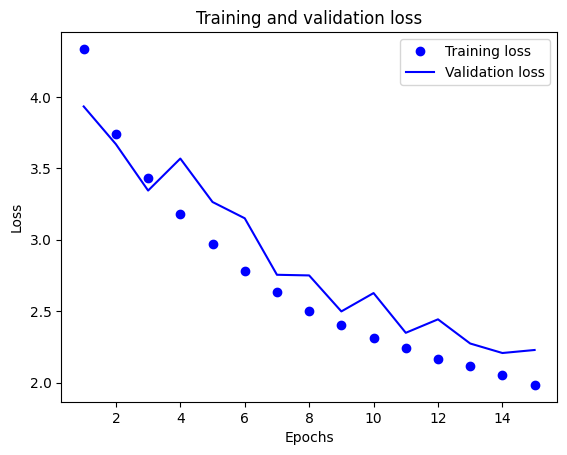

In [8]:
import matplotlib.pyplot as plt

# Making a graph mapping the trajectory of training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['loss']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [9]:
# Prototyping model testing
result = model_testing.evaluate(x_test, y_test)
result

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.4231 - loss: 2.2106


[2.2128825187683105, 0.42329999804496765]

In [19]:
import numpy as np

# Conducting full training
final_model = design_cnn()
final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
final_model.fit(np.concatenate((sub_x_train, x_val_set)), np.concatenate((sub_y_train, y_val_set)), epochs=15, batch_size=256, validation_data=(x_val_set, y_val_set))

Epoch 1/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 63ms/step - accuracy: 0.0261 - loss: 4.6894 - val_accuracy: 0.0927 - val_loss: 3.9132
Epoch 2/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.1167 - loss: 3.7868 - val_accuracy: 0.1291 - val_loss: 3.7747
Epoch 3/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.1810 - loss: 3.3806 - val_accuracy: 0.1981 - val_loss: 3.3762
Epoch 4/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.2333 - loss: 3.1001 - val_accuracy: 0.2009 - val_loss: 3.2503
Epoch 5/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.2739 - loss: 2.8725 - val_accuracy: 0.3333 - val_loss: 2.5641
Epoch 6/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.3075 - loss: 2.6719 - val_accuracy: 0.3809 - val_loss: 2.3294
Epoch 7/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.3431 - loss: 2.5280 - val_accuracy: 0.3759 - val_loss: 2.3538
Epoch 8/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.3670 - loss: 2.4088 - val_acc

In [20]:
# Calculate and compare the test accuracy of the final model using test dataset
result = final_model.evaluate(x_test, y_test)
result

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4691 - loss: 1.9991


[2.000016212463379, 0.4702000021934509]